# Group 10 - Homework 2

## Group Members:
1. Mahajabin Mostafa
2. Navya Madhuri Bagireddy
3. Akshay Manoj
4. Vinaika Maruvada

## Introduction:

**Linear Regression:**</br>

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable. The link between one dependent variable and one or more independent variables is explained using these regression estimations.

**Simple Linear Regression:**</br>

Simple linear regression aims to find a linear relationship to describe the correlation between an independent and possibly dependent variable.</br>
The formula for a simple linear regression model is ℎ(𝑥)=𝑤𝑥+𝑏.

**Multiple Linear Regression:**</br>

Multiple linear regression (MLR) is used to determine a mathematical relationship among several random variables. In other terms, MLR examines how multiple independent variables are related to one dependent variable.
The formula for a multiple linear regression model is <i> h(x)= b + w1x1 + w2x2 + ... + wkxk</i>.

## Question-1

### (a)
**Notice that we used 100 epochs which was waste of time and we could have stopped earlier since after about epoch 55 or so, the loss is not getting lower significantly. Modify that code so that if the percentage change in loss is less than 1%, you exit the iterations.**

## Aim:
The aim of this task is to implement early stopping based on a criterion of minimal percentage change in loss to optimize training time and resources.

## About the Dataset:

It consists of 150 observations of iris flowers, including the sepal and petal length and width for each flower, as well as the species of the flower.

The variables are:
* **sepal_length:** Sepal length, in centimeters
* **sepal_width:** Sepal width, in centimeters
* **petal_length:** Petal length, in centimeters
* **petal_width:** Petal width, in centimeters
* **species:** Iris Setosa, Versicolor, or Virginica </br>

We will consider <span style="color:red;"> **Setosa flowers** </span> in the iris data set and we'll use linear regression to predict <span style="color:red;"> **"sepal width"** </span> as a linear function of <span style="color:red;"> **"sepal length"** </span>. 

## Methodology:

#### 1. Importing Necessary Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import a function for plotting decision boudaries
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

#### 2. Load the Iris dataset into a Pandas DataFrame

In [3]:
# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("iris_dataset.csv")
df.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [4]:
df = df.iloc[:50][["sepal_length", "sepal_width"]] #setosa
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [5]:
df.shape

(50, 2)

#### 3. Scatter plot of two species for two species 

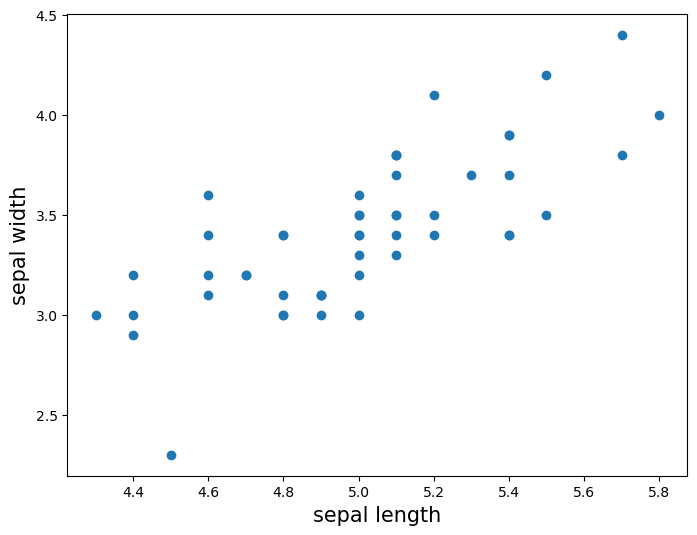

In [6]:
# We create the scatter plot

plt.figure(figsize = (8, 6))

plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("sepal width", fontsize = 15);

The scatter plot visually represents the relationship between the length and width of sepals in a dataset, potentially revealing any trends, patterns, or groupings present in the data. It helps us understand if there's any correlation between sepal length and width and provides a quick way to spot any outliers or clusters within the dataset.</br> 

From the above plot we can see that there is a positive relationship between both variables, i.e., as the sepal length is increasing we can observe an increase in the sepal width too.

#### 4. Covariance between two variables

In [156]:
# We compute covariance between the two variables

df.cov()

,sepal_length,sepal_width
sepal_length,0.124249,0.100298
sepal_width,0.100298,0.145180


Here we learn about how these two variables change in relation to one another within the dataset by calculating the covariance between sepal length and width. A positive covariance indicates that sepal length and width tend to rise together.

In order to determine the level of their connection, additional analysis, such as correlation coefficients is required as the covariance value alone does not indicate the strength of the relationship.

#### 5. Correlation between two variables

In [7]:
# We cpompute the correlation between the two variables

df.corr()

,sepal_length,sepal_width
sepal_length,1.00000,0.74678
sepal_width,0.74678,1.00000


Finding the correlation between sepal width and length within the dataset reveals information on the direction and intensity of the link between the two variables. A significant positive correlation is shown by a correlation value 0.74678 near to +1 between sepal length and sepal width, which implies that sepal width tends to increase along with sepal length.

#### 6. Defining a MyLinReg() for linear regression

In [53]:
class MyLinReg(object):
    """
    A class used to represent a single artificial neuron for linear regression. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation term.

    theta : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the fit method is called.

    errors : list
        A list containing the mean squared error computed after each iteration 
        of batch gradient descent. 

    Methods
    -------
    fit(self, X, y, alpha = 0.001, epochs = 10)
        Iterates the batch gradient descent algorithm through each sample
        a total of epochs number of times with learning rate alpha. The data 
        consists of the feature vector X and the associated target y. 

    predict(self, X)
        Uses the weights and bias, the feature vector X, and the 
        activation_function to make a prediction on each data instance. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha = 0.001, epochs = 100):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]

        for _ in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0
            for xi, yi in zip(X, y):
                sum_1 += (self.predict(xi) - yi)*xi
                sum_2 += (self.predict(xi) - yi)
                errors += ((self.predict(xi) - yi)**2) #MSE
            self.theta[:-1] -= 2*alpha*sum_1/n #slope
            self.theta[-1] -= 2*alpha*sum_2/n #bias
            self.errors.append(errors/n) 
            
            # Calculate percentage loss
            percentage_loss = (self.errors[-1] - self.errors[-2]) / self.errors[-2] if len(self.errors) > 1 else np.inf

            if abs(percentage_loss) < 0.01:  # If percentage loss is less than 1%
                break  # Stop the iteration
            
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

In [54]:
X = df[['sepal_length']].to_numpy() # for dot product to work
X

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ]])

In [55]:
X.shape

(50, 1)

In [56]:
y = df['sepal_width'].to_numpy()
y

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

#### 7. Activation Function

In [57]:
#activation function
def identity_function(z):
    return z

Here the identity function serves as the activation function. It signifies that the output of the model is directly proportional to the input.

#### 8. Instantiating an instance of MyLinReg class with identity activation function

In [58]:
# We instantiate an instance of MyLinReg class with identity activation function

model = MyLinReg(identity_function)
model.fit(X, y)

In [59]:
model.predict(X)

array([3.40296394, 3.28327647, 3.163589  , 3.10374527, 3.34312021,
       3.58249514, 3.10374527, 3.34312021, 2.9840578 , 3.28327647,
       3.58249514, 3.22343274, 3.22343274, 2.92421407, 3.82187008,
       3.76202635, 3.58249514, 3.40296394, 3.76202635, 3.40296394,
       3.58249514, 3.40296394, 3.10374527, 3.40296394, 3.22343274,
       3.34312021, 3.34312021, 3.46280767, 3.46280767, 3.163589  ,
       3.22343274, 3.58249514, 3.46280767, 3.64233888, 3.28327647,
       3.34312021, 3.64233888, 3.28327647, 2.9840578 , 3.40296394,
       3.34312021, 3.04390153, 2.9840578 , 3.34312021, 3.40296394,
       3.22343274, 3.40296394, 3.10374527, 3.52265141, 3.34312021])

#### 9. Visualization of the Model

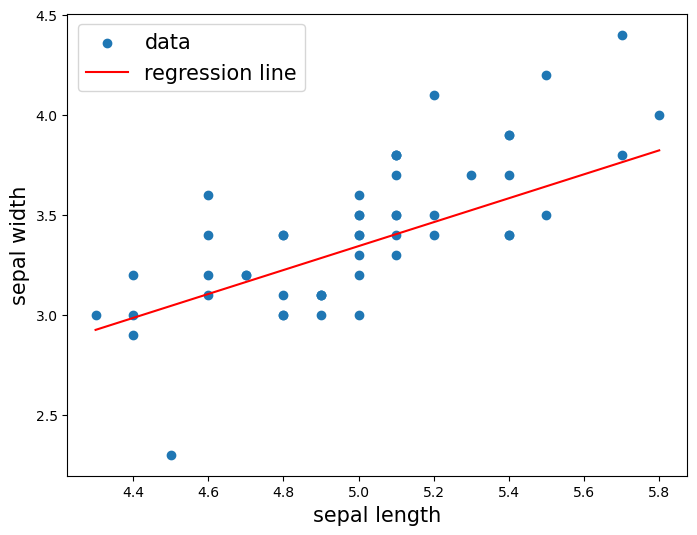

In [60]:
domain_x = np.linspace(np.min(X), np.max(X), 5)
domain_y = model.predict(domain_x.reshape(-1,1))

plt.figure(figsize = (8, 6))

plt.scatter(X, y, label = "data")
plt.plot(domain_x, domain_y, color="red", label ="regression line")
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("sepal width", fontsize = 15)
plt.legend(fontsize=15);

The prediction of the linear regression model for sepal width based on sepal length is shown in this plot by the red line. The real data points are represented by the scatter points. We may evaluate how well the linear model fits the underlying link between sepal length and sepal width by displaying the regression line next to the data. 

The visual demonstrates to us how well the model can identify patterns in the data and forecast outcomes based on the linear connection between the variables.

#### 10. Root Mean Square Error at each Epoch

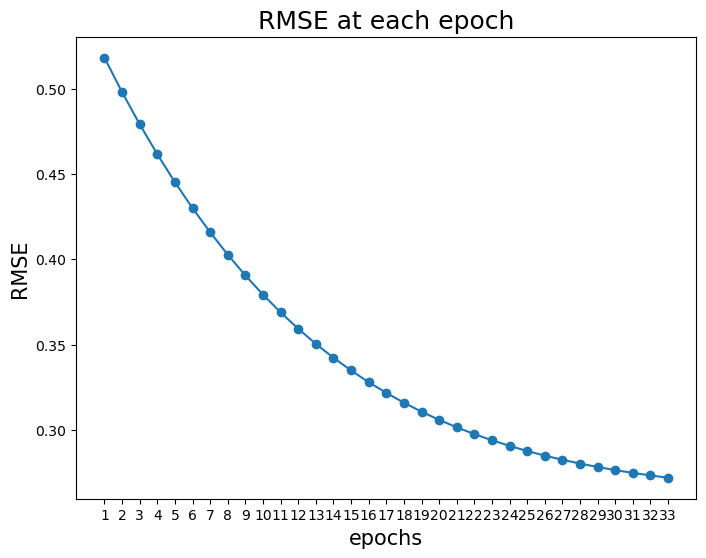

In [64]:
plt.figure(figsize = (8, 6))

plt.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.xticks(range(1, len(model.errors) + 1))
plt.title("RMSE at each epoch", fontsize = 18);

## Conclusion:

* From the above scatter and line plot we can see linear regression fit on the dataset, showing how the predicted line aligns with the data points. 
* From the above Root Mean Squared Error (RMSE) plot, we can see the RMSE at each epoch during model training, allowing assessment of the model's convergence and performance over time. By analyzing this plot we can see that we have implemented an early stopping mechanism based on the percentage change in loss, ending iterations when the change is less than 1%. This change makes sure the model converges efficiently without using extra epochs. It improves model training efficiency, and reaches timely convergence with low loss.

## (b)

**The class MyLinReg in the above code uses batch gradient descent to find the minimum of the loss function. Modify the original code and use the stochastic gradient descent instead. Iterate over many iterations and see how the RMSE changes. The graph of RMSE for the batch gradient descent is smooth and decreasing as the number of iterations increases. What can you say about the graph of RMSE when the stochastic gradient descent is used?**

## Aim:

The goal of this task is to observe the behavior of RMSE using stochastic gradient descent, which typically results in a more erratic and fluctuating graph compared to the smooth, decreasing trend observed with batch gradient descent.

## Dataset:

We will consider the same dataset used in the above question. 

We will use <span style="color:red;"> **Setosa flowers** </span> in the iris data set and we'll use linear regression to predict <span style="color:red;"> **"sepal width"** </span> as a linear function of <span style="color:red;"> **"sepal length"** </span>. 

## Methodology:

#### 1.Defining a MyLinReg() for linear regression using stochastic gradient descent

In [195]:
import numpy as np

class MyLinReg(object):
    """
    A class used to represent a single artificial neuron for linear regression. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation term.

    theta : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the fit method is called.

    errors : list
        A list containing the mean squared error computed after each iteration 
        of stochastic gradient descent. 

    Methods
    -------
    fit(self, X, y, alpha = 0.001, epochs = 10)
        Iterates the stochastic gradient descent algorithm through each sample
        a total of epochs number of times with learning rate alpha. The data 
        consists of the feature vector X and the associated target y. 

    predict(self, X)
        Uses the weights and bias, the feature vector X, and the 
        activation_function to make a prediction on each data instance. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha = 0.001, epochs = 100): # better way to fix aplha: learning rate = 1/t(no.of iterations)
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for _ in range(n):  
                i = np.random.randint(0, 50)
                xi = X[i]
                yi = y[i]
                weighted_sum = np.dot(xi, self.theta[:-1]) + self.theta[-1]
                error = (self.predict(xi) - yi)
                self.theta[:-1] -= 2 * alpha * error * xi
                self.theta[-1] -= 2 * alpha * error
                errors += error**2
            self.errors.append(errors)  
            
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)


In [196]:
X = df[['sepal_length']].to_numpy() # for dot product to work
X

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ]])

In [197]:
X.shape

(50, 1)

In [198]:
y = df['sepal_width'].to_numpy()
y

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

#### 2. Activation Function

In [199]:
#activation function
def identity_function(z):
    return z

#### 3. Instantiating an instance of MyLinReg class with identity activation function

In [200]:
# We instantiate an instance of MyLinReg class with identity activation function

model = MyLinReg(identity_function)
model.fit(X, y)

#### 4.Visulization of the Model

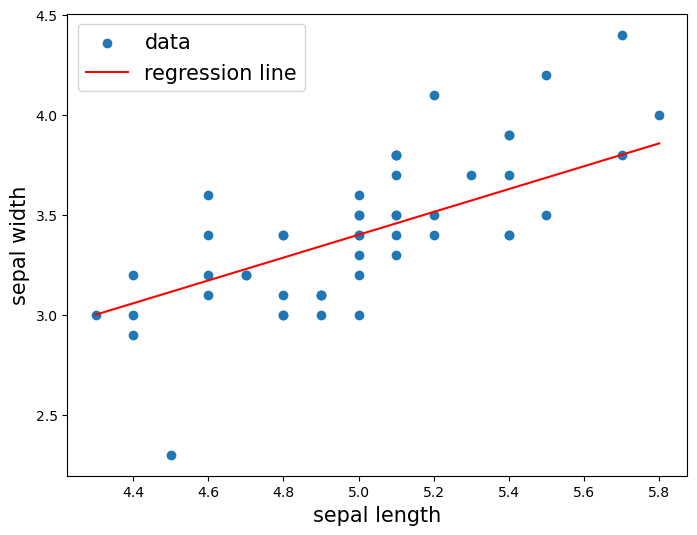

In [201]:
domain_x = np.linspace(np.min(X), np.max(X), 5)
domain_y = model.predict(domain_x.reshape(-1,1))

plt.figure(figsize = (8, 6))

plt.scatter(X, y, label = "data")
plt.plot(domain_x, domain_y, color="red", label ="regression line")
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("sepal width", fontsize = 15)
plt.legend(fontsize=15);

#### 5. RMSE

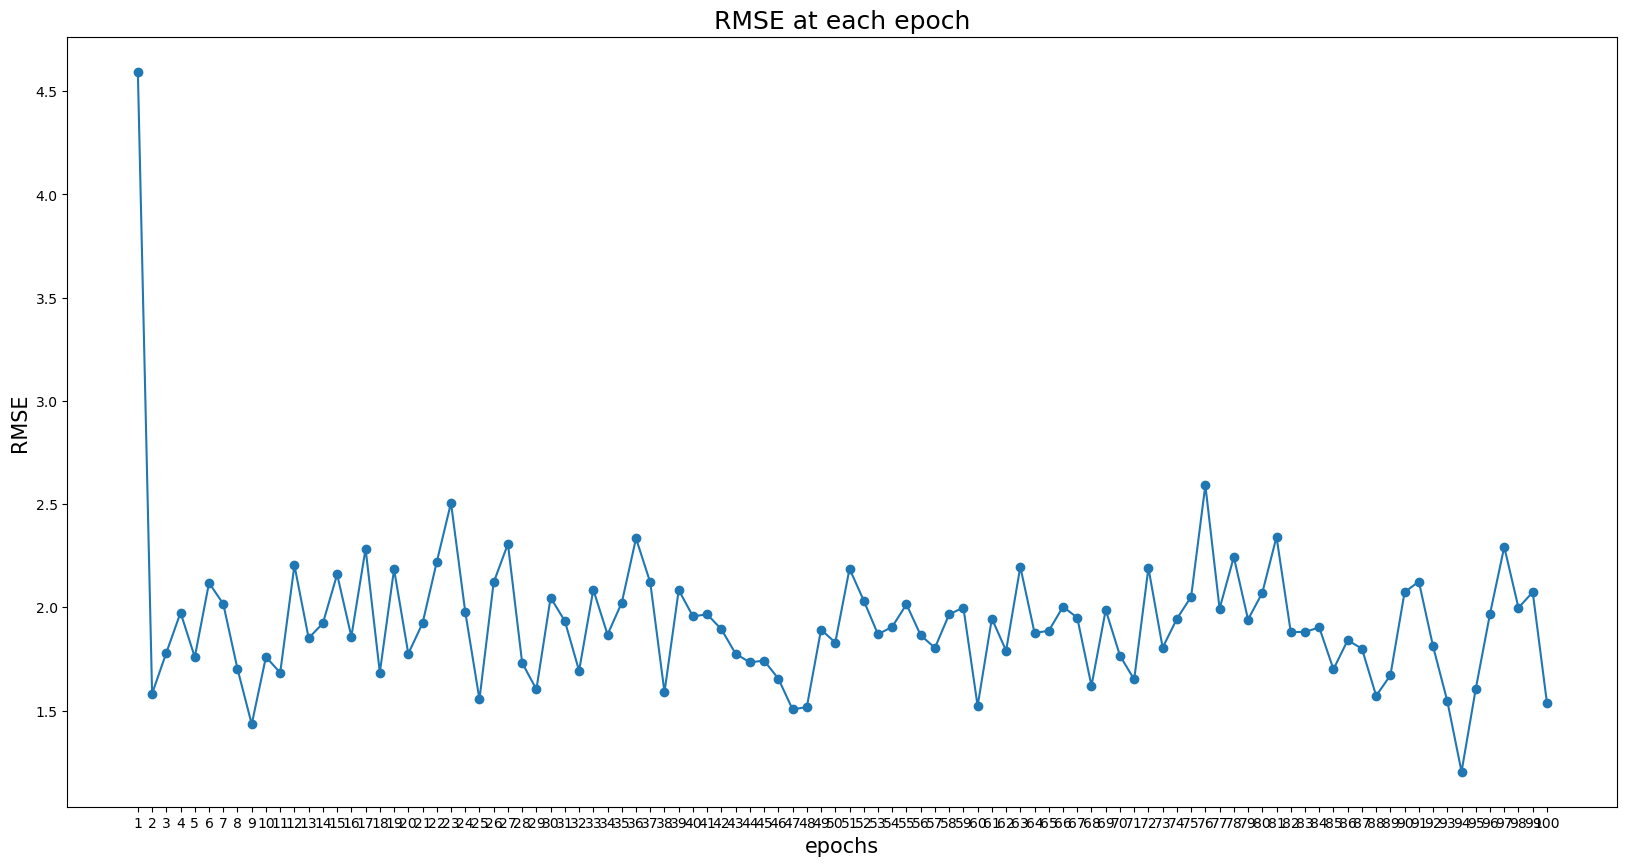

In [204]:
plt.figure(figsize = (20, 10))

plt.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.xticks(range(1, len(model.errors) + 1))
plt.title("RMSE at each epoch", fontsize = 18);

In [104]:
model.predict(X)

array([3.28094279, 3.18438075, 3.08781872, 3.0395377 , 3.23266177,
       3.42578584, 3.0395377 , 3.23266177, 2.94297567, 3.18438075,
       3.42578584, 3.13609974, 3.13609974, 2.89469465, 3.61890991,
       3.57062889, 3.42578584, 3.28094279, 3.57062889, 3.28094279,
       3.42578584, 3.28094279, 3.0395377 , 3.28094279, 3.13609974,
       3.23266177, 3.23266177, 3.32922381, 3.32922381, 3.08781872,
       3.13609974, 3.42578584, 3.32922381, 3.47406686, 3.18438075,
       3.23266177, 3.47406686, 3.18438075, 2.94297567, 3.28094279,
       3.23266177, 2.99125668, 2.94297567, 3.23266177, 3.28094279,
       3.13609974, 3.28094279, 3.0395377 , 3.37750482, 3.23266177])

In [105]:
y

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

When comparing y predicted and y actual we can observe that the values are almost similar. 

## Conclusion:

The RMSE of the linear regression model trained with stochastic gradient descent is displayed at each epoch in the figure. In contrast to batch gradient descent done in 1(a), which often shows a smooth and declining trend, the RMSE graph using stochastic gradient descent typically shows greater volatility and unpredictability over epochs. This is a reflection of SGD's intrinsic stochastic character, which results in a less predictable convergence path as updates are based on randomly selected data points.

## Question - 2

**Try using sklearn SGDRegressor class instead of sklearn LinearRegression. If the input variables are of different scales (here, TV and radio), scaling those variables typically improves SGD convergence. Read about sklearn MinMaxScaler and try to see if using it will give better results.**

## Aim:

In order to improve optimization and predictive accuracy, this task aims to investigate the effects of scaling input variables using sklearn's MinMaxScaler on the convergence and performance of the SGDRegressor class, especially when dealing with features of different scales like TV and radio advertising expenditures.


## About the Dataset:

The advertising dataset captures the Sales revenue generated with respect to advertisement costs across multiple channels like Radio, Tv, and Newspapers. It is required to understand the impact of ad budgets on the overall sales.

* Sales: Dependent variable

The independent variables in the dataset are:

* TV
* Radio
* Newspaper

## Methodology:

#### 1. Importing Necessary Packages

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

import seaborn as sns

#### 2. Loading the advertising dataset into a pandas dataframe object

In [107]:
ads_data = pd.read_csv("advertising_dataset.csv") 

In [108]:
ads_data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [112]:
#we only considered Tv and Radio to predict sales as given n the question.
ads_data = ads_data[["TV", "radio", "sales"]]
ads_data.head(10)

,TV,radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
5,8.7,48.9,7.2
6,57.5,32.8,11.8
7,120.2,19.6,13.2
8,8.6,2.1,4.8
9,199.8,2.6,10.6


In [113]:
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   radio   200 non-null    float64
 2   sales   200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


#### 3. Plotting the variables

C:\Users\Vinaika Maruvada\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


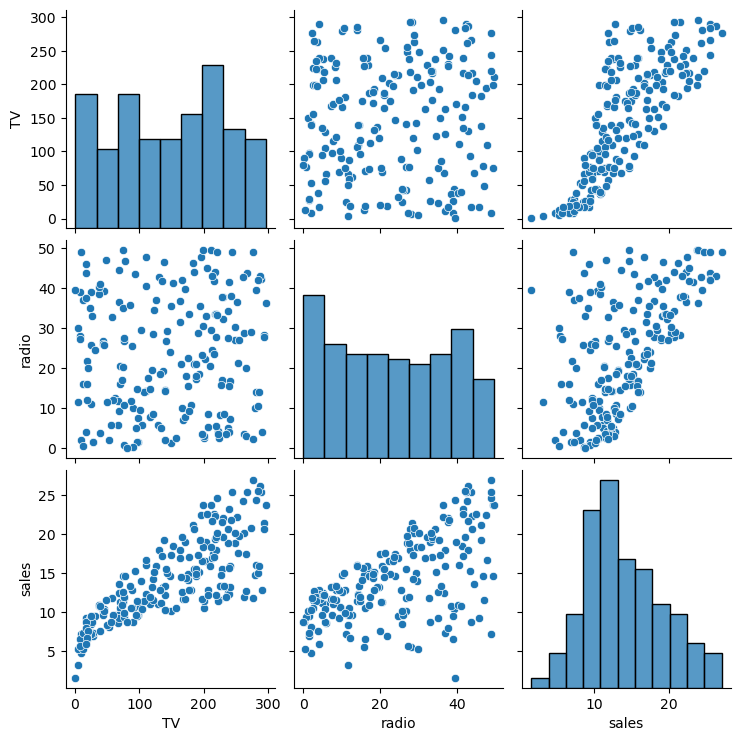

In [114]:
sns.pairplot(ads_data)

It shows the pairwise associations between the various variables (TV, radio, and sales income) in the advertising dataset. It helps us comprehend the impact and performance of every advertising medium on sales results by enabling us to visually evaluate correlations and possible trends between advertising budgets across several media channels and total sales income.

#### 4. Covariance

In [115]:
ads_data.cov()

,TV,radio,sales
TV,7370.949893,69.862492,350.390195
radio,69.862492,220.427743,44.635688
sales,350.390195,44.635688,27.221853


For each variable in the advertising dataset, it computes the covariance matrix. The variation between pairs of variables, such sales revenue, radio, and TV, is quantified in this matrix. We can see a positive relation between both TV and sales and radio and sales.

#### 5. Correlation

In [116]:
corr_matrix = np.round(ads_data.corr(), 2) #rounded it to 2
corr_matrix

,TV,radio,sales
TV,1.00,0.05,0.78
radio,0.05,1.00,0.58
sales,0.78,0.58,1.00


The correlation coefficient between TV advertising expenditures and sales revenue is 0.78, it indicates a moderately strong positive correlation. Then between radio advertising expenditures and sales revenue the correlation coeffficient is 0.58, indicating a moderate positive correlation. There's a very weak correlation between TV and radio advertising expenditures.

#### 6. Heatmap

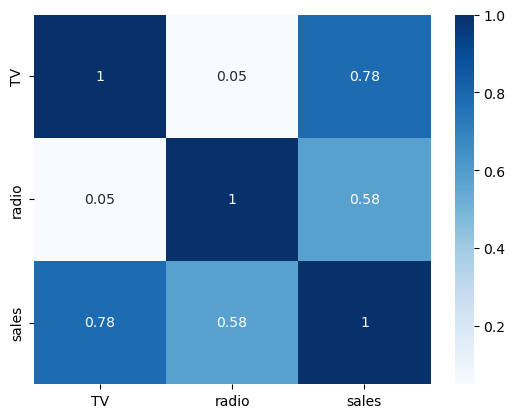

In [117]:
sns.heatmap(data=corr_matrix, annot=True, cmap="Blues");

The correlation matrix is shown as a heatmap, with each pixel in the heatmap representing the correlation coefficient between two variables in the advertising dataset.

Based on the scatter plots as well the correlation coefficients, we choose the variables TV and Radio to 
predict Sales.

#### 7. Using SGDRegressor Without MinMaxScaler

In [118]:
X = ads_data[['TV', 'radio']]  # Double array
y = ads_data['sales']

Here variable X represents a two-dimensional array containing the 'TV' and 'Radio' advertising expenditures columns from the advertising dataset. Variable  y represents a one-dimensional array containing the 'sales' revenue column from the same dataset. 

**8. Splitting data into train and test | Building Linear Regression Model using SGD Regressor**

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
#busilding linear regression model using SGD Regressor
SGD_reg = SGDRegressor()

SGD_reg.fit(X_train, y_train)

SGDRegressor()

In [123]:
w = SGD_reg.coef_ #in array, as w can have multiple coefficient
b = SGD_reg.intercept_
w, b

(array([-2.84077645e+10,  5.45350235e+10]), array([-4.00947575e+10]))

An array containing the coefficients linked to the features in the linear regression model fitted with stochastic gradient descent (SGD) is included in variable w. The linear regression model's intercept term is represented by variable b. In order to construct the linear relationship between the features and the goal variable in the model and enable predictions of the target variable based on the input features, w and b work together to give the appropriate parameters.

In [124]:
print(f"The linear regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * TV + {np.round(w[1],3)} * radio + {np.round(b,3)}")

The linear regression model based on the training data is 

predicted_sales = -28407764539.391 * TV + 54535023508.834 * radio + [-4.00947575e+10]


With an intercept term, it displays the anticipated sales as a mix of scaled coefficients for the "TV" and "radio" characteristics. The model's predictive method is transparent due to the rounded coefficient values, which give a clear depiction of each feature's contribution to the expected sales outcome.

In [125]:
mse_train = mean_squared_error(y_train, SGD_reg.predict(X_train))
mse_test = mean_squared_error(y_test, SGD_reg.predict(X_test))

print(f"MSE on the training data: {np.sqrt(mse_train)}\n")
print(f"MSE on the test data: {np.sqrt(mse_test)}")

MSE on the training data: 3935016985612.604

MSE on the test data: 3648242914517.324


The trained SGDRegressor model's Mean Squared Error (MSE) is for the training and test datasets. It provides insight into the correctness of the model by evaluating the squared difference between the actual and forecasted sales figures. 

On the training data, the Mean Squared Error (MSE) is around 16.02 trillion, but on the test data, it is roughly 14.99 trillion. 

Clearly we see large coefficent values in determining sales and also high MSE on training and test data. This is because we havent scaled our training data intially before building a model. We now will first scale the training data and then built a linear regression model using SGD Regressor.

#### 9. Using SGDRegressor With MinMaxScaler

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
# Spliting the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
# Scaling the input features using min-max scaling
scaler= MinMaxScaler()

scaler.fit(X_train)

X_scaledtrain=scaler.transform(X_train)
X_scaledtest=scaler.transform(X_test)

In [130]:
# Creating and fitting the SGDRegressor model

sgd_regressor = SGDRegressor()

In [131]:
sgd_regressor.fit(X_scaledtrain,y_train)
sgd_regressor.predict(X_scaledtest)

array([16.24822006, 20.43830793, 21.0018912 , 10.94400338, 21.69604413,
       13.21861883, 20.64357782,  8.01703226, 13.66206402, 15.11400158,
        9.56963558,  7.22187681, 14.16075404,  9.43778232, 10.01391284,
       12.29425042,  9.1955418 , 16.18378317, 10.60905932, 18.57204592,
       19.10124751, 13.20268712, 12.63341101, 20.73117173,  8.39051111,
        6.45169625, 20.34729784, 12.21388423,  9.58581132,  9.08060364,
       12.58816103, 10.39326997, 20.88529615, 12.36927261, 17.934702  ,
       19.81597334, 14.25106373, 20.31743049, 11.33867005,  5.3088982 ])

In [132]:
w = sgd_regressor.coef_ #in array, as w can have multiple coefficient
b = sgd_regressor.intercept_
w, b

(array([12.18699496,  8.83285678]), array([3.91943076]))

In [133]:
print(f"The linear regression model based on the training data is:")
print(f"predicted_sales = {np.round(w[0],3)} * TV + {np.round(w[1],3)} * radio + {np.round(b,3)}")

The linear regression model based on the training data is:
predicted_sales = 12.187 * TV + 8.833 * radio + [3.919]


In other words, for each unit increase in advertisement on TV by keeping radio as constant, Sales increases with 12.187 units.
For each unit increase in advertisement on Radio (with TV constant), Sales increases with 8.833 units.
And the intercept here indicates that when there was no spent for advertisement on TV and Radio, Sales is equals to 3.919.

In [134]:
mse_train = mean_squared_error(y_train, sgd_regressor.predict(X_scaledtrain))
mse_test = mean_squared_error(y_test, sgd_regressor.predict(X_scaledtest))

print(f"MSE on the training data: {np.sqrt(mse_train)}\n")
print(f"MSE on the test data: {np.sqrt(mse_test)}")

MSE on the training data: 1.6846079000292777

MSE on the test data: 1.8686108857067534


Clearly, the MSE on both training and test data is low which implies that our model after scaling is a very good model to predict sales.

In [135]:
y_pred = sgd_regressor.predict(X_scaledtest)

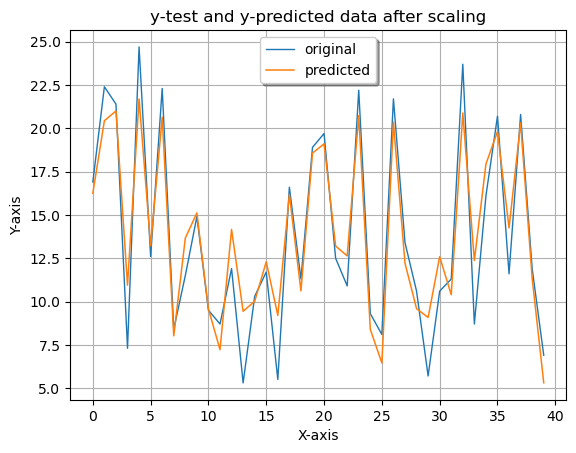

In [136]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data after scaling")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

In [137]:
# Coefficent of Determination

score = sgd_regressor.score(X_scaledtest, y_test)
print("R-squared:", score)

R-squared: 0.889375504264885


The R-squared: 0.8893 

Since 0.889 > 0.5, therefore we can say that it is a good model.
It also implies that 88.93% of the total variation in Sales is explained by advertisement costs on TV and Radio.

## Conclusion:

The model's performance significantly improved after utilizing MinMaxScaler, according to the findings. The Mean Squared Error (MSE) on the training and test data is abnormally high when MinMaxScaler is not used, suggesting poor model performance and substantial prediction mistakes. Nevertheless, the MSE values sharply decline with the application of MinMaxScaler, indicating that the model's predictions are now considerably closer to the actual values. The notable decrease in mean square error (MSE) suggests that increasing the input feature scale has greatly enhanced the model's predictive power and accuracy for sales results. 

Based on RMSE and R-squared value we can say that if we do scaling our model is going to perform really well.

## Question -3

**Import the data file mtcars.csv. The goal is to determine two or three continuous numerical variables that can be used to predict mpg (miles per gallon) using multiple linear regression. You can use sklearn or custom class; batch GD, SGD, or mini-batch SGD; and scaling.**

## Aim: 

In this question we ll be using sklearn Linear Regression fucntion to build a multiple linear regression model on the mtcars dataset to predict mpg using significant numerical independent variables.

## About the dataset:

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

A data frame with 32 observations on 11 (numeric) variables.

* mpg	Miles/(US) gallon
* cyl	Number of cylinders
* disp	Displacement (cu.in.)
* hp	Gross horsepower
* drat	Rear axle ratio
* wt	Weight (1000 lbs)
* qsec	1/4 mile time
* vs	Engine (0 = V-shaped, 1 = straight)
* am	Transmission (0 = automatic, 1 = manual)
* gear	Number of forward gears
* carb	Number of carburetors

mpg: is the dependent variable. And among the other numeric variables, based on some analysis we will choose the best independent variables, that can be used to predict mpg using a multiple linear regression model.

## Methodology:

**1. Importing Necessary Packages**

In [175]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

**2. Load the mtcars dataset into a Pandas DataFrame**

In [140]:
mt_cars = pd.read_csv("mtcars.csv")
mt_cars = mt_cars.drop("Unnamed: 0",axis=1)

In [141]:
mt_cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [143]:
mt_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [146]:
mt_cars.shape

(32, 11)

There are no null values in our dataset and also there are 32 records and 11 columns in this dataset

In [142]:
mt_cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


From the above output we can see different statistical quantities like count, mean, min, max etc. for all our numerical variables.

**3. Exploratory Data Analysis**

C:\Users\Vinaika Maruvada\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


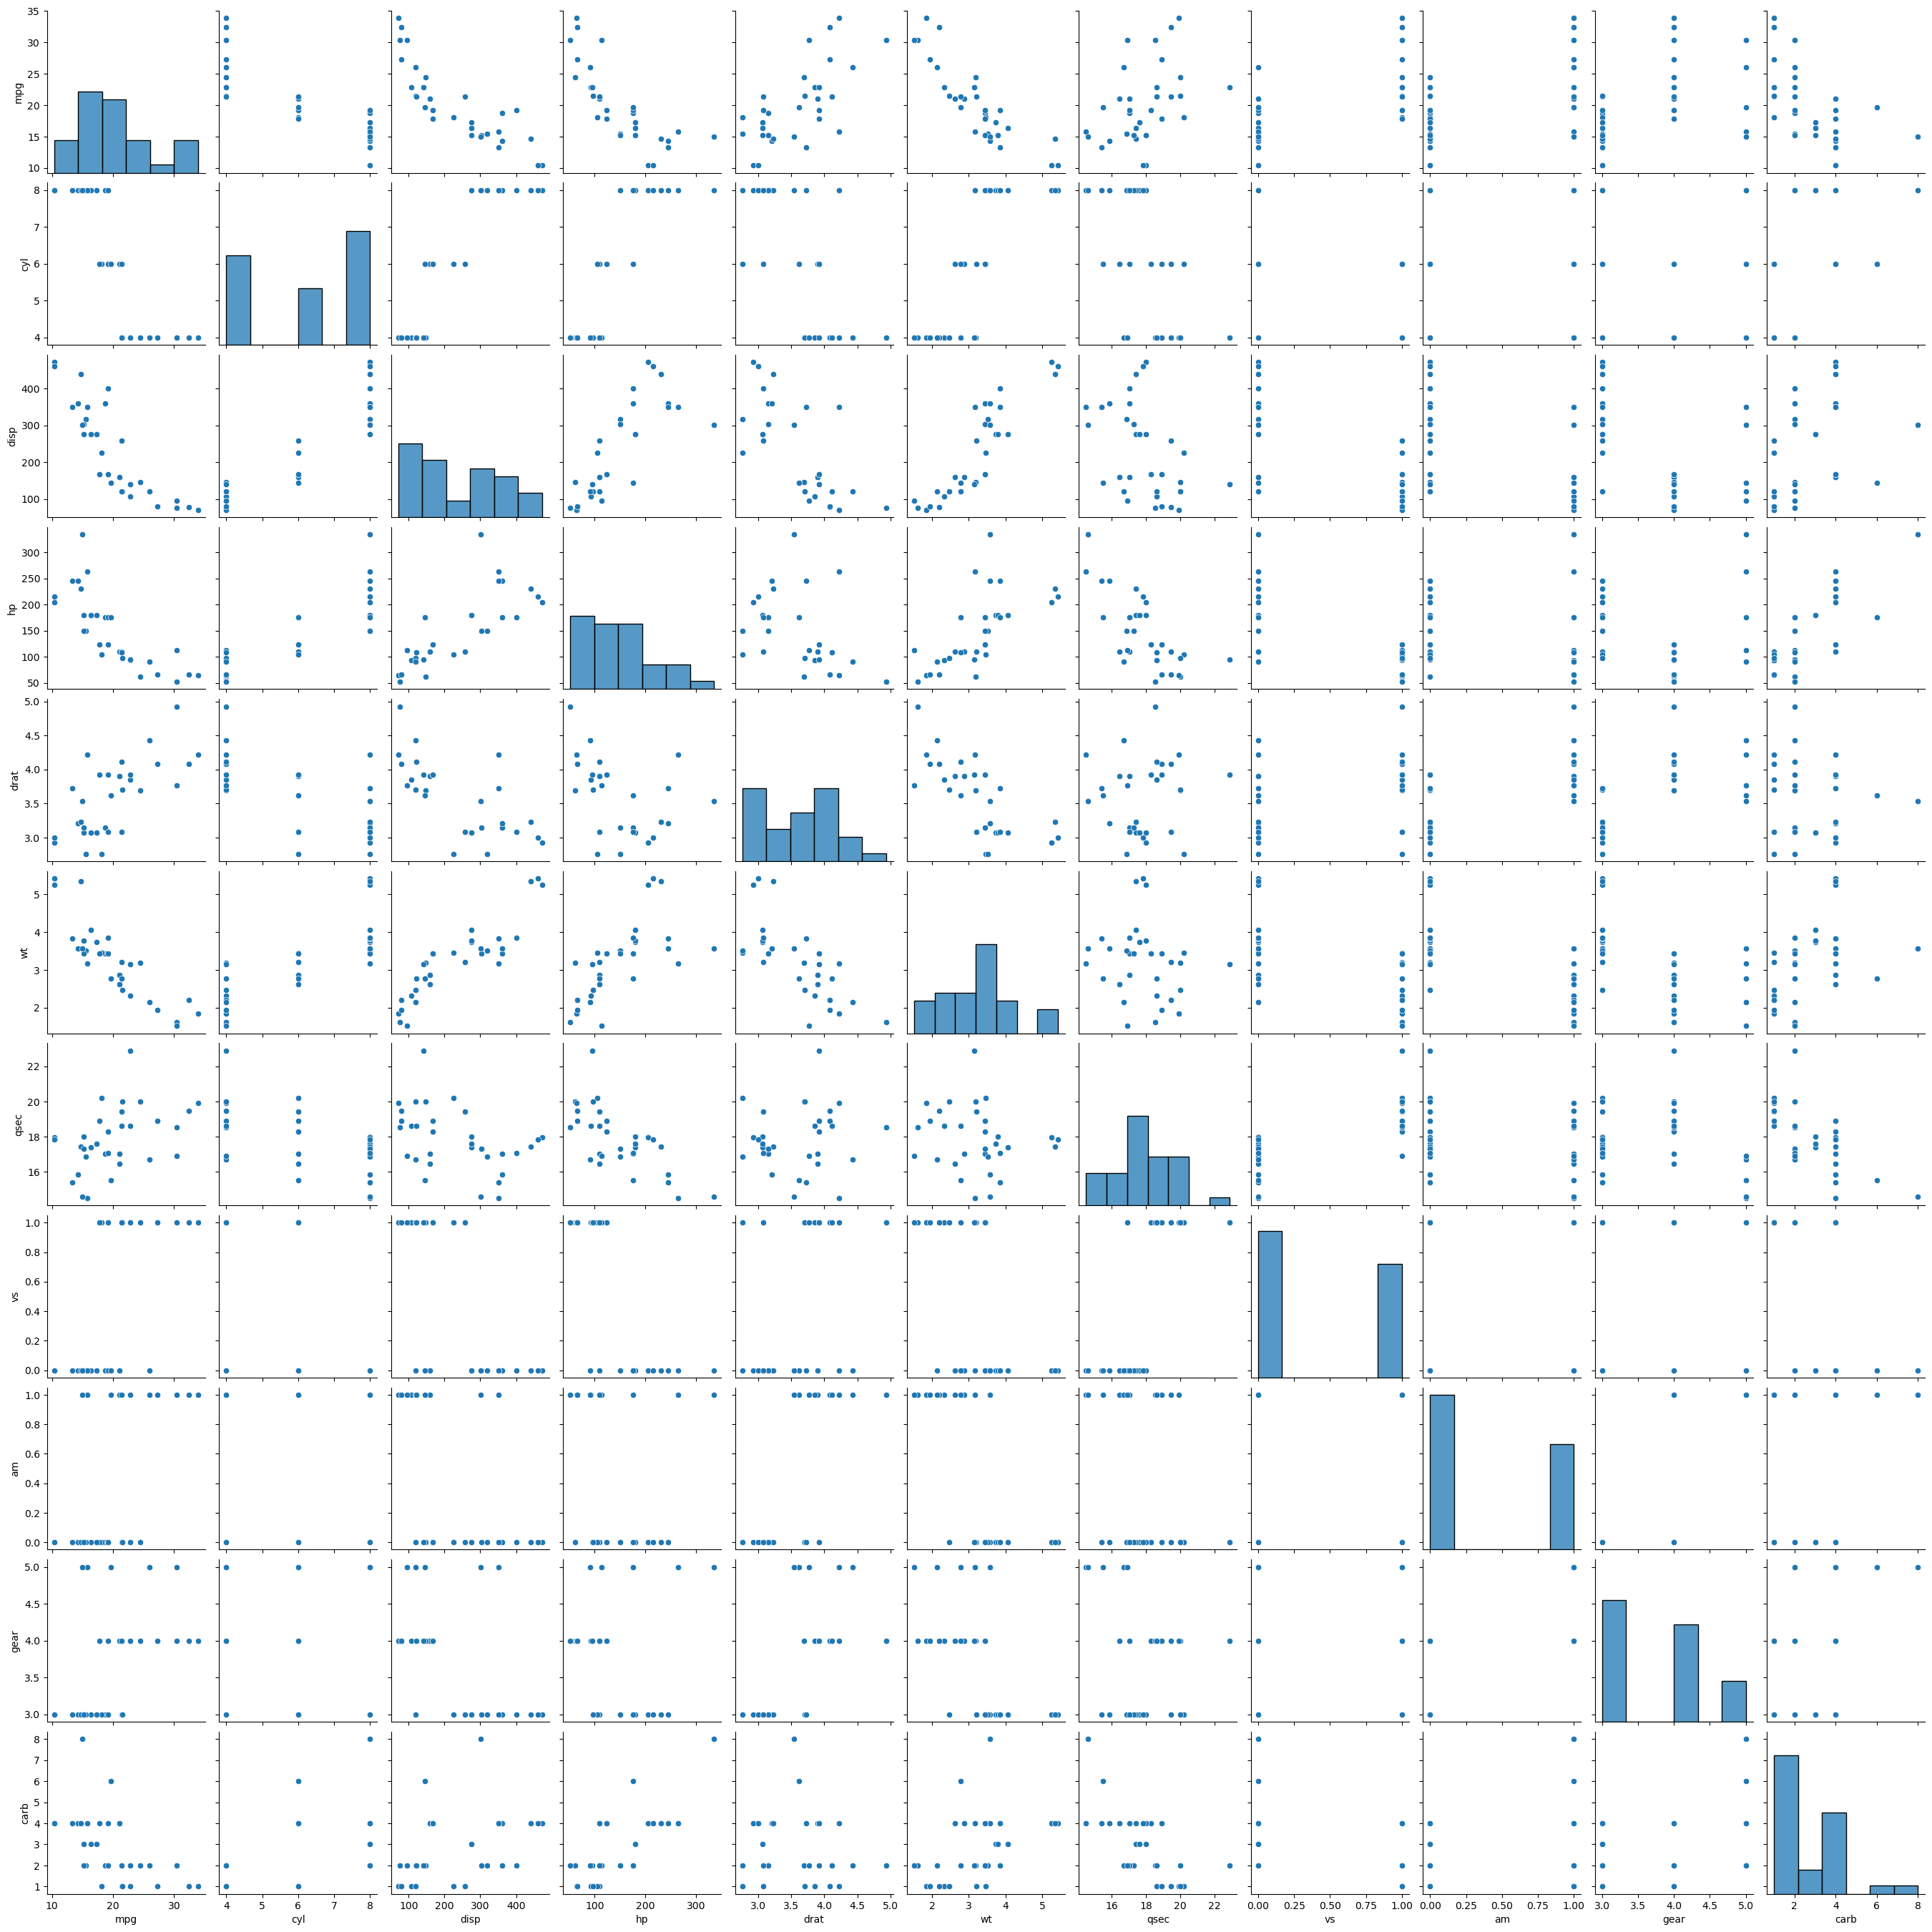

In [147]:
#pairplot gives the scatter plot for each variable with other variable
sns.pairplot(mt_cars)

In [148]:
# correlation matrix for all the numerical variables
corr_matrix = np.round(mt_cars.corr(), 2)
corr_matrix

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


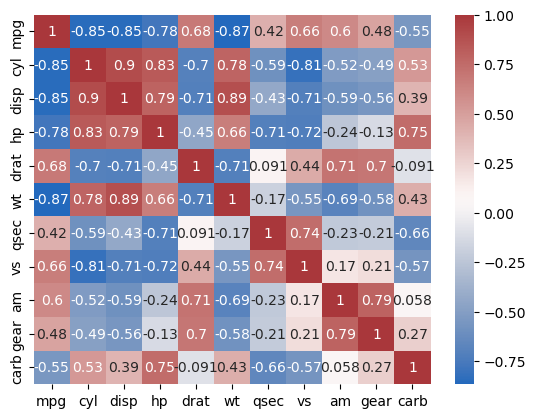

In [149]:
# heatmap for all the numerical variables
sns.heatmap(mt_cars.corr(),annot=True,cmap = "vlag")
plt.show()

From the above heat map and the scatter plot we can see that the correlation of variables **wt** and **disp** with **mpg** is high. We can see a strong negative relationship between wt, disp and mpg.
So in the below analysis we are going to predict the variable **'mpg'** using two independent variables **'wt' and 'disp'** by building a multiple linear regression model.

Text(0.5, 1.0, 'Boxplot for Displacement')

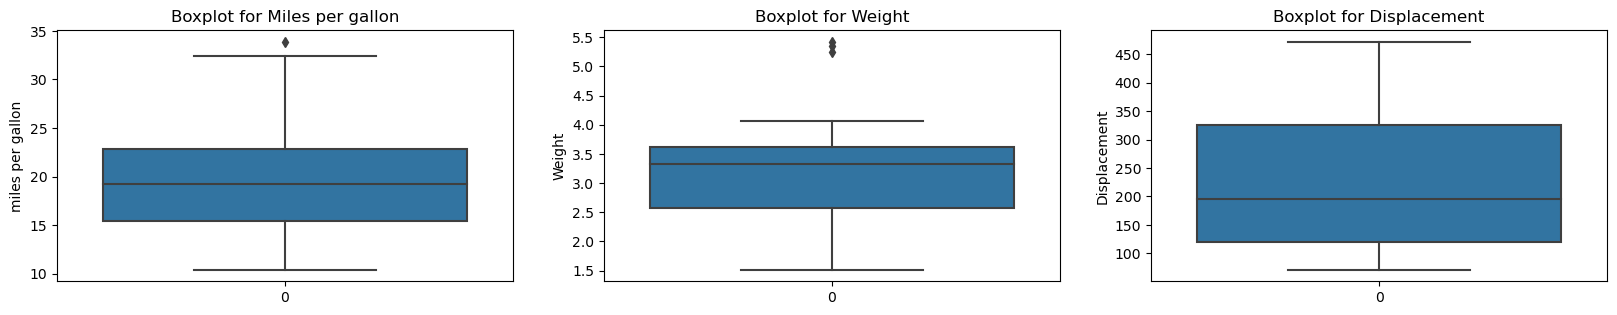

In [164]:
# boxplot for the selected variables: mpg, wt and disp
plt.figure(figsize = (20,15))
plt.tight_layout(pad = 3.0)
plt.subplot(4,3,1)
sns.boxplot(mt_cars['mpg'])
plt.ylabel('miles per gallon')
plt.title('Boxplot for Miles per gallon')
plt.subplot(4,3,2)
sns.boxplot(mt_cars['wt'])
plt.ylabel('Weight')
plt.title('Boxplot for Weight')
plt.subplot(4,3,3)
sns.boxplot(mt_cars['disp'])
plt.ylabel('Displacement')
plt.title('Boxplot for Displacement')



From the above box plot for the selected variables, **"mpg, wt and disp"**, we see one outlier for <i>mpg</i> and some outliers for <i>wt</i> which can be neglected.

C:\Users\Vinaika Maruvada\AppData\Local\Temp\ipykernel_18412\1034901921.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mt_cars['mpg'], color='skyblue', shade=True)


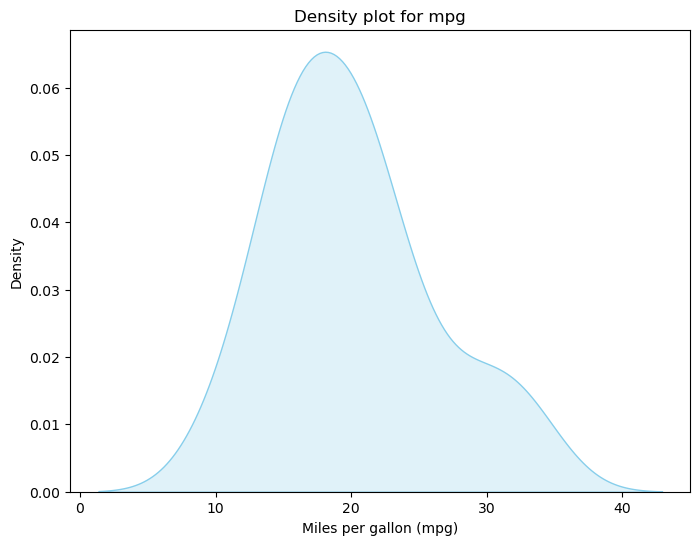

In [171]:
#Density plot for the target variable 'mpg' to understand its distribution

import seaborn as sns

# Plot the density plot for mpg
plt.figure(figsize=(8, 6))
sns.kdeplot(mt_cars['mpg'], color='skyblue', shade=True)
plt.title('Density plot for mpg')
plt.xlabel('Miles per gallon (mpg)')
plt.ylabel('Density')
plt.show()


It slightly different from normal distribution as we can see its a bit skewed and we dont see a perfectly bell shaped curve.

**4. Defining X and y and splitting into train and test**

In [172]:
X = mt_cars[['wt','disp']] #independent variables
y = mt_cars['mpg'] #dependent variable

In [173]:
#we are splitting the whole data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**SCALING:**

We dont have to do scaling if we are using LinearRegression() from sklearn. Because it performs the analytical method by finding the normal equations to get the coefficent values. Since the data is getting normalized, we dont have to scale it again.

So in the below analysis, we used the LinearRegression() from sklearn and hence haven't implemeted scaling.

**5. Buldiing a Multiple Linear Regression model using sklearn LinearRegression()**

In [176]:
#building the model
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [177]:
#printing the coefficients
w = lin_reg.coef_
b = lin_reg.intercept_
w, b

(array([-2.97199655, -0.01437093]), 32.70562910542145)

In [178]:
print("The linear regression model based on the training data is \n")
print(f"predicted_mpg = {np.round(w[0],3)} * wt + {np.round(w[1],3)} * disp + {np.round(b,3)}")

The linear regression model based on the training data is 

predicted_mpg = -2.972 * wt + -0.014 * disp + 32.706


In other words, for each unit increase in weight by keeping displacement as constant, mpg(miles per gallon) decreases with 2.972 units. For each unit increase in displacement (with weight), mpg decreases with 0.014 units. 

**6. Model Performance**

In [183]:
mse_train = mean_squared_error(y_train, lin_reg.predict(X_train))
mse_test = mean_squared_error(y_test, lin_reg.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 2.5405325317584397

RMSE on the test data: 3.8844949223144747


The RMSE on the training data is 2.54 and the RMSE on the test data is 3.88. We can say the linear regression model we built is a good fit as we observe a low RMSE.

In [184]:
y_pred = lin_reg.predict(X_test) #y-predicted values

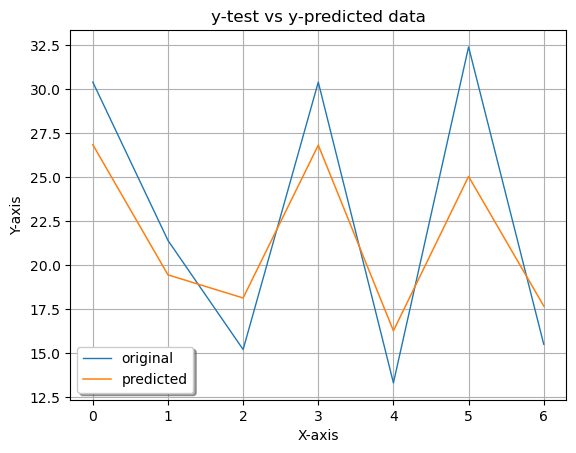

In [186]:
#plotting a graph to see how the original and predicted values appear with our model
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test vs y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

## Conclusion:

The Mean Squared Error (MSE) on the training and test data is low. Also from the actual vs predicted values line graph, we see a good fit. So, we can conclude that the multiple linear regression model built to predict mpg using wt and disp is a good model. 

Below is the regression equation:

**predicted_mpg = -2.972 * wt + -0.014 * disp + 32.706**